In [2]:
from matplotlib import pyplot as plt

import numpy as np

Consider the binding process of KaiA and the KaiBC complex

$$
A + BC \rightleftharpoons ABC
$$

Where the binding affinity is expressed as

$$
K_d = \frac{[A]_{free}[BC]_{free}}{[ABC]} \label{1}
$$

Assume that each hexameric KaiBC complex binds $6n$ KaiA. E.g. in a C6B6A4 complex $n = 2/3$
while in a C6B6A6 complex $n = 1$.

Then the conservation law is written as

$$
\begin{align}
[A]_{total} &= [A]_{free} + n[ABC]\\
[BC]_{total} &= [BC]_{free} + [ABC]
\end{align}
$$

Here I constrain $[BC]_{total} = 3.5 \mu M$ and solve for $[A]_{free}$ as a function of $[A]_{total}$.

Now, imagine that the stoichiometry $n$ and the binding affinity $K_d$ are differentially sensitive to temperature.
Suppose that we have a state with larger A/C stoichiometry but lower affinity, and another
state with smaller A/C stoichiometry but higher affinity

In [85]:
BCtot = 3.5

Atot_vec = np.linspace(0, 6.5, 1001)

def free(total, n, Kd):
    Delta = (n*BCtot - total + Kd)**2 + 4*Kd*total
    ret = -1/2*(n*BCtot - total + Kd - np.sqrt(Delta))
    return ret

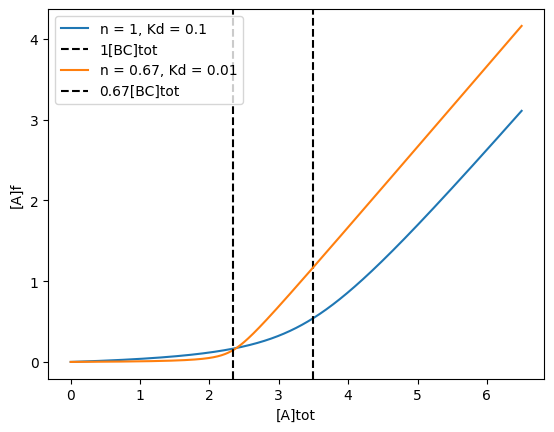

In [86]:
# The two conditionds mimic cold and warm temperatures
Kd_vec = [0.1, 0.01]
n_vec = [1, 0.67]    # the number KaiA one KaiBC can sequester

for i in range(2):
    Kd = Kd_vec[i]
    n = n_vec[i]
    
    Af_vec = free(Atot_vec, n, Kd)
    
    plt.plot(Atot_vec, Af_vec, label = f"n = {n}, Kd = {Kd}")
    plt.axvline(n*BCtot, linestyle="dashed", color="black", label = f"{n}[BC]tot")
    
plt.xlabel("[A]tot")
plt.ylabel("[A]f")
plt.legend()
plt.show()